# Scan aerosols 
=========================


- Sylvie Dagoret-Campagne
- Affiliation LAL-IN2P3-CNRS
- Work : LSST & StarDice
- date December 1st 2017


In [27]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
import pandas as pd
import os
import re 

In [29]:
import astropy.units as u

In [30]:
from scipy.interpolate import interp1d

In [31]:
import sys
sys.path.append('../libradtransim')

In [32]:
import libsimulateTranspLSSTScattAbsAer as atm

In [33]:
#help(atm)

In [34]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Read atmosphere

In [35]:
beta_aerosol=np.linspace(0.,0.5,10)
lambda0_aerosol=500. # nm
airmass=1.
pwv=4.0     # mm
ozone=0. # DU
alpha=0.1 # angstrom coefficients

In [36]:
path,thefile=atm.ProcessSimulation(airmass,pwv,ozone) 
fullfilename=os.path.join(path,thefile)
atm_data=np.loadtxt(fullfilename)
wl_atm0=atm_data[:,0]
tr_atm0=atm_data[:,1]  


--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0.INP')
('Output to file                : ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0.OUT')
('uvspec cmd: ', '/Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0.INP > simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0.OUT')


In [37]:
all_wl_atm= []
all_tr_atm= []

for beta in beta_aerosol:
      path,thefile=atm.ProcessSimulationaer2(airmass,pwv,ozone,alpha,beta) 
      fullfilename=os.path.join(path,thefile)
      atm_data=np.loadtxt(fullfilename)
      wl_atm=atm_data[:,0]
      tr_atm=atm_data[:,1]  
      all_wl_atm.append(wl_atm) 
      all_tr_atm.append(tr_atm) 

--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) alpha =  0.1
 5) beta =  0.0
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer210.INP')
('Output to file                : ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer210.OUT')
('uvspec cmd: ', '/Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer210.INP > simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer210.OUT')
--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) alpha =  0.1
 5) beta =  0.0555555555556
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer210.INP')
('Output to file        

### bind together wavelength and transmission

In [38]:
wl_and_tr_atm=zip(all_wl_atm,all_tr_atm)  

## plot air-transmission

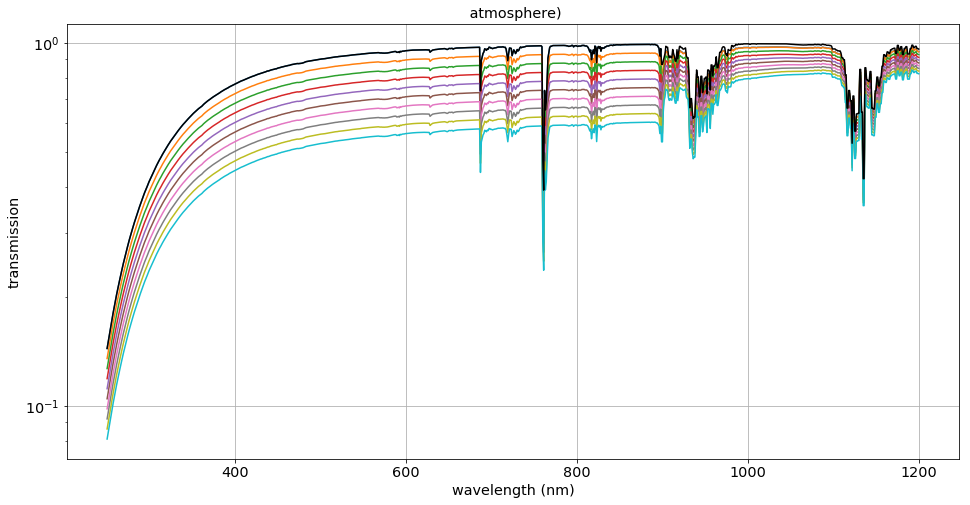

In [39]:
for wl_atm,tr_atm in wl_and_tr_atm:
    plt.semilogy(wl_atm,tr_atm)
plt.semilogy(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title(" atmosphere)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.savefig("atm-transm.png")

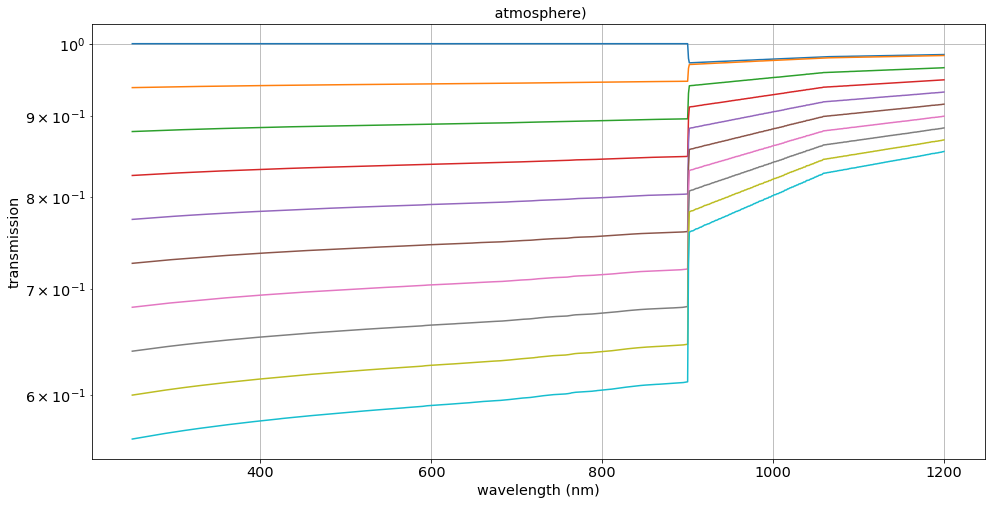

In [40]:
for wl_atm,tr_atm in wl_and_tr_atm:
    plt.semilogy(wl_atm,tr_atm/tr_atm0)
plt.grid()
plt.title(" atmosphere)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.savefig("atm-transm.png")

In [41]:
beta_aerosol=np.linspace(0.,0.5,10)
lambda0_aerosol=500. # nm
airmass=1.
pwv=4.0     # mm
ozone=0. # DU
alpha=1.0 # angstrom coefficients

In [42]:
all_wl_atm= []
all_tr_atm= []

for beta in beta_aerosol:
      path,thefile=atm.ProcessSimulationaer2(airmass,pwv,ozone,alpha,beta) 
      fullfilename=os.path.join(path,thefile)
      atm_data=np.loadtxt(fullfilename)
      wl_atm=atm_data[:,0]
      tr_atm=atm_data[:,1]  
      all_wl_atm.append(wl_atm) 
      all_tr_atm.append(tr_atm) 

--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) alpha =  1.0
 5) beta =  0.0
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer2100.INP')
('Output to file                : ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer2100.OUT')
('uvspec cmd: ', '/Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer2100.INP > simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer2100.OUT')
--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) alpha =  1.0
 5) beta =  0.0555555555556
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer2100.INP')
('Output to file   

In [43]:
wl_and_tr_atm=zip(all_wl_atm,all_tr_atm)  

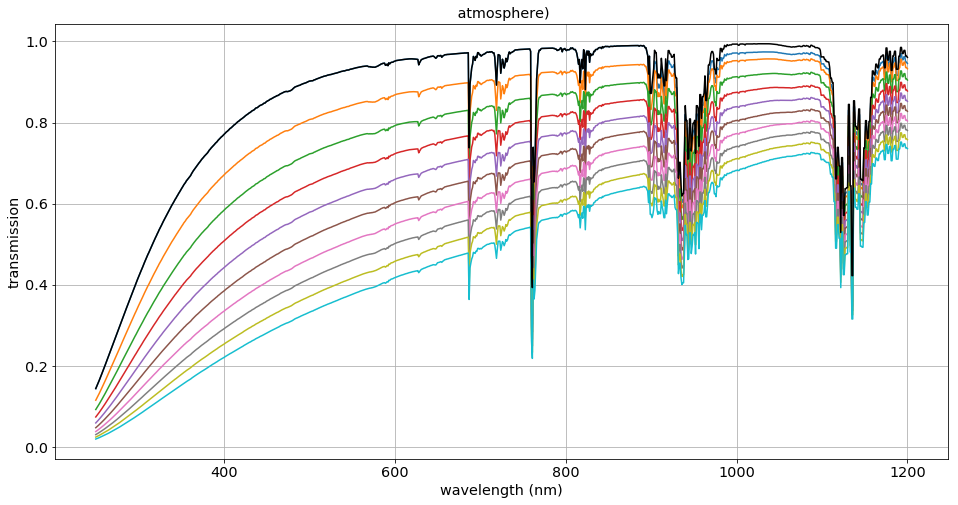

In [44]:
for wl_atm,tr_atm in wl_and_tr_atm:
    plt.plot(wl_atm,tr_atm)
plt.plot(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title(" atmosphere)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.savefig("atm-transm.png")

In [45]:
beta_aerosol=0.05
lambda0_aerosol=500. # nm
airmass=1.
pwv=4.0     # mm
ozone=0. # DU
alpha_aerosol=np.linspace(0.,2.,10) # angstrom coefficients

In [46]:
all_wl_atm= []
all_tr_atm= []

for alpha in alpha_aerosol:
      path,thefile=atm.ProcessSimulationaer2(airmass,pwv,ozone,alpha,beta_aerosol) 
      fullfilename=os.path.join(path,thefile)
      atm_data=np.loadtxt(fullfilename)
      wl_atm=atm_data[:,0]
      tr_atm=atm_data[:,1]  
      all_wl_atm.append(wl_atm) 
      all_tr_atm.append(tr_atm) 

--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) alpha =  0.0
 5) beta =  0.05
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer20.INP')
('Output to file                : ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer20.OUT')
('uvspec cmd: ', '/Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer20.INP > simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer20.OUT')
--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) alpha =  0.222222222222
 5) beta =  0.05
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer222.INP')
('Output to file           

In [47]:
wl_and_tr_atm=zip(all_wl_atm,all_tr_atm)  

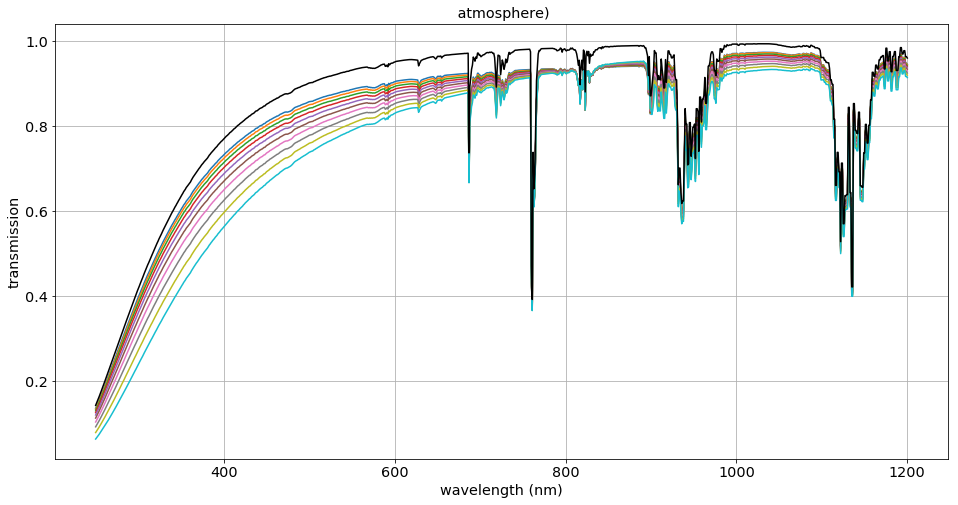

In [48]:
for wl_atm,tr_atm in wl_and_tr_atm:
    plt.plot(wl_atm,tr_atm)
plt.plot(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title(" atmosphere)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.savefig("atm-transm.png")